In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
# sns.set()
# sns.set_style("white")
# sns.set_palette("GnBu_d")
%matplotlib inline

import folium
from folium import plugins
from folium.plugins import HeatMap
from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
import math
import random
from pathlib import Path

import geopy
from geopy.geocoders import GoogleV3
from geopy.distance import geodesic

In [2]:
df_cluster = pd.read_csv("../boston_2016_prep_cluster.csv")
# df_cluster = df

In [3]:
df_customer = df_cluster.drop(df_cluster[df_cluster['user_type'] == "Subscriber"].index)
df_subscriber = df_cluster.drop(df_cluster[df_cluster['user_type'] == "Customer"].index)

In [63]:
print("customers:", (len(df_customer)/len(df_cluster))*100,'%')

customers: 20.6080730517796 %


In [64]:
print("subscribers:", (len(df_subscriber)/len(df_cluster))*100,'%')

subscribers: 79.3919269482204 %


In [6]:
len(df_cluster)

1233608

In [7]:
df_cluster = df_cluster.drop(df_cluster[df_cluster.index % 2 == 0].index)
df_cluster = df_cluster.reset_index()
len(df_cluster)

616804

In [8]:
df_cluster = df_cluster.drop(df_cluster[df_cluster.index % 2 == 0].index)
df_cluster = df_cluster.reset_index()
len(df_cluster)

308402

In [9]:
df_cluster.drop(['level_0'], axis=1, inplace=True)
df_cluster = df_cluster.drop(df_cluster[df_cluster.index % 2 == 0].index)
df_cluster = df_cluster.reset_index()
len(df_cluster)

154201

In [10]:
df_cluster.drop(['level_0'], axis=1, inplace=True)
df_cluster = df_cluster.drop(df_cluster[df_cluster.index % 2 == 0].index)
df_cluster = df_cluster.reset_index()
len(df_cluster)

77100

In [11]:
df_cluster.drop(['level_0'], axis=1, inplace=True)
df_cluster = df_cluster.drop(df_cluster[df_cluster.index % 2 == 0].index)
df_cluster = df_cluster.reset_index()
len(df_cluster)

38550

In [12]:
df_cluster.drop(['level_0'], axis=1, inplace=True)
df_cluster = df_cluster.drop(df_cluster[df_cluster.index % 2 == 0].index)
df_cluster = df_cluster.reset_index()
len(df_cluster)

19275

In [13]:
df_cluster.drop(['level_0'], axis=1, inplace=True)
df_cluster = df_cluster.drop(df_cluster[df_cluster.index % 2 == 0].index)
df_cluster = df_cluster.reset_index()
len(df_cluster)

9637

In [14]:
df_cluster.head(1)

level_0  index  Unnamed: 0           start_time             end_time  \
0        1    127         129  2016-01-01 15:28:37  2016-01-01 15:44:28   

   start_station_id  end_station_id  \
0               105             107   

                                start_station_name    end_station_name  \
0  Lower Cambridgeport at Magazine St/Riverside Rd  Ames St at Main St   

   bike_id  ...                        start_coordinates  \
0     1293  ...  (42.357218503176526, -71.1138716340065)   

        end_coordinates distance_km  duration_sec  speed_kmh  \
0  (42.3625, -71.08822)    2.193164         951.0     8.3022   

   start_distance_center  end_distance_center  start_hour  weekday_start  \
0               4.617206             2.500986          15              4   

   weekday_end  
0            4  

[1 rows x 21 columns]

In [15]:
df_cluster.drop(['index','level_0','Unnamed: 0','start_time','end_time','start_station_id','end_station_id','start_station_name','end_station_name','bike_id','start_coordinates','end_coordinates','weekday_end'], axis=1, inplace=True)

In [16]:
df_customer = df_cluster.drop(df_cluster[df_cluster['user_type'] == "Subscriber"].index)
df_subscriber = df_cluster.drop(df_cluster[df_cluster['user_type'] == "Customer"].index)

In [17]:
len(df_customer)

1986

In [18]:
len(df_subscriber)

7651

In [19]:
df_cluster['user_type'] = df_cluster['user_type'].replace(['Customer','Subscriber'],[0,1])
# user_type:
# 0 = Customer
# 1 = Subscriber

df_customer.drop(['user_type'], axis=1, inplace=True)
df_subscriber.drop(['user_type'], axis=1, inplace=True)

In [20]:
# df_cluster['weekday_start'] = df_cluster['weekday_start'].replace([0,1,2,3,4,5,6],[0,0,0,0,0,1,1])
# df_cluster['weekday_end'] = df_cluster['weekday_end'].replace([0,1,2,3,4,5,6],[0,0,0,0,0,1,1])
# 0 -> workday
# 1 -> weekend 

In [21]:
# df_cluster.drop(['duration_sec'], axis=1, inplace=True)
# df_cluster = df_cluster.drop(df_cluster[df_cluster['duration_sec'] > 7200].index)
# df_cluster.drop(['speed_kmh'], axis=1, inplace=True)
# df_cluster.drop('start_hour', axis=1, inplace=True)
# df_cluster.drop("user_type", axis=1, inplace=True)
# df_cluster.drop('weekday_start', axis=1, inplace=True) 

## All Cluster

X -> df_cluster bei workshop

In [22]:
X = df_cluster

In [23]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X)
# X_scaled = scaler.transform(X)

# # create a df out of array
# X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
# X_scaled_df.head(10)

In [24]:
# df_scaled = X_scaled_df

In [25]:
from sklearn.cluster import KMeans

In [26]:
# k_max = 50  # We have 147 datapoints, more than 50 clusters are definitely not reasonable!

# clusters = []
# losses = []

# for k in range(k_max):
#     model = KMeans(n_clusters=k+1)
#     model.fit(X_scaled)
#     clusters.append(k+1)
#     losses.append(model.inertia_)

In [27]:
# plt.plot(clusters, losses)
# plt.show()

In [28]:
# plt.plot(clusters, losses)
# plt.xlim([0,20])

In [29]:
numbers = ["zero", "one", "two", "three","four","five","six"]

In [30]:
# # refit algorithm
# two_means = KMeans(n_clusters=2)
# two_means.fit(X_scaled)

# # match records to clusters by calling predict
# # two_means.predict(X_scaled)

# df_scaled["clusters"] = two_means.predict(X_scaled)
# df_scaled["clusters"] = df_scaled["clusters"].apply(lambda x: numbers[x])
# sns.pairplot(data=df_scaled, hue="clusters")

In [31]:
# three_means = KMeans(n_clusters=3)
# three_means.fit(X_scaled)
# df_scaled["clusters"] = three_means.predict(X_scaled)
# df_scaled["clusters"] = df_scaled["clusters"].apply(lambda x: numbers[x])
# sns.pairplot(data=df_scaled, hue="clusters")

In [32]:
# four_means = KMeans(n_clusters=4)
# four_means.fit(X_scaled)
# df_scaled["clusters"] = four_means.predict(X_scaled)
# df_scaled["clusters"] = df_scaled["clusters"].apply(lambda x: numbers[x])
# sns.pairplot(data=df_scaled, hue="clusters")

In [33]:
# five_means = KMeans(n_clusters=5)
# five_means.fit(X_scaled)
# df_scaled["clusters"] = five_means.predict(X_scaled)
# df_scaled["clusters"] = df_scaled["clusters"].apply(lambda x: numbers[x])
# sns.pairplot(data=df_scaled, hue="clusters")

In [34]:
# six_means = KMeans(n_clusters=6)
# six_means.fit(X_scaled)
# df_scaled["clusters"] = six_means.predict(X_scaled)
# df_scaled["clusters"] = df_scaled["clusters"].apply(lambda x: numbers[x])
# sns.pairplot(data=df_scaled, hue="clusters")

In [35]:
# seven_means = KMeans(n_clusters=7)
# seven_means.fit(X_scaled)
# df_scaled["clusters"] = seven_means.predict(X_scaled)
# df_scaled["clusters"] = df_scaled["clusters"].apply(lambda x: numbers[x])
# sns.pairplot(data=df_scaled, hue="clusters")

## Customer Cluster

In [36]:
XC = df_customer

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(XC)
XC_scaled = scaler.transform(XC)

# create a df out of array
XC_scaled_df = pd.DataFrame(XC_scaled, columns=XC.columns, index=XC.index)
XC_scaled_df.head(10)

distance_km  duration_sec  speed_kmh  start_distance_center  \
0      0.281962     -0.297410   0.349477               1.004906   
3     -0.279566     -0.746722   2.646019               0.280612   
11     0.325426     -0.453904   1.045326               0.997472   
13     0.022787     -0.407999   0.400248               1.711384   
17     1.419992     -0.241767   1.397871               1.745473   
18     1.148103     -0.311320   1.409835               1.004906   
20     0.052876     -0.534586   1.076217              -0.354797   
28    -1.064795     -0.848965   1.244278               1.466050   
38     0.425546     -0.455991   1.207983               1.004906   
42    -0.748002     -0.789150   1.630739               1.423965   

    end_distance_center  start_hour  weekday_start  
0             -0.144202    0.150611       0.290643  
3             -0.472066   -0.752371       1.265671  
11             0.082068    0.376356      -0.684385  
13             2.002516   -1.655352      -0.196871  
17             0.082068   -1.881098       0.290643  
18            -0.591935   -0.978116       0.290643  
20             0.618131    0.602101       0.290643  
28             1.215491    1.279337      -1.659413  
38             0.302026    0.602101      -0.196871  
42             1.057610    0.602101       0.290643

In [38]:
df_C_scaled = XC_scaled_df

In [39]:
# from sklearn.cluster import KMeans

In [40]:
k_max = 50  # We have 147 datapoints, more than 50 clusters are definitely not reasonable!

clusters = []
losses = []

for k in range(k_max):
    model = KMeans(n_clusters=k+1)
    model.fit(XC_scaled)
    clusters.append(k+1)
    losses.append(model.inertia_)

C:\Users\rfrei\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


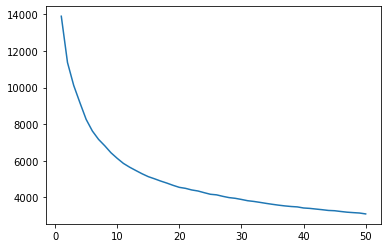

In [41]:
plt.plot(clusters, losses)
plt.show()

(0.0, 20.0)

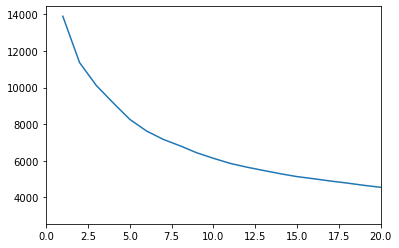

In [42]:
plt.plot(clusters, losses)
plt.xlim([0,20])

In [43]:
df_customer.head(10)

distance_km  duration_sec  speed_kmh  start_distance_center  \
0      2.193164         951.0   8.302200               4.617206   
3      1.497483         305.0  17.675211               3.310986   
11     2.247012         726.0  11.142208               4.603799   
13     1.872071         792.0   8.509413               5.891295   
17     3.603080        1031.0  12.581073               5.952773   
18     3.266233         931.0  12.629903               4.617206   
20     1.909349         610.0  11.268287               2.165064   
28     0.524657         158.0  11.954203               5.448850   
38     2.371053         723.0  11.806071               4.617206   
42     0.917134         244.0  13.531489               5.372953   

    end_distance_center  start_hour  weekday_start  
0              2.500986          15              4  
3              1.905842          11              6  
11             2.911715          16              2  
13             6.397737           7              3  
17             2.911715           6              4  
18             1.688254          10              4  
20             3.884783          17              4  
28             4.969120          20              0  
38             3.310986          17              3  
42             4.682531          17              4

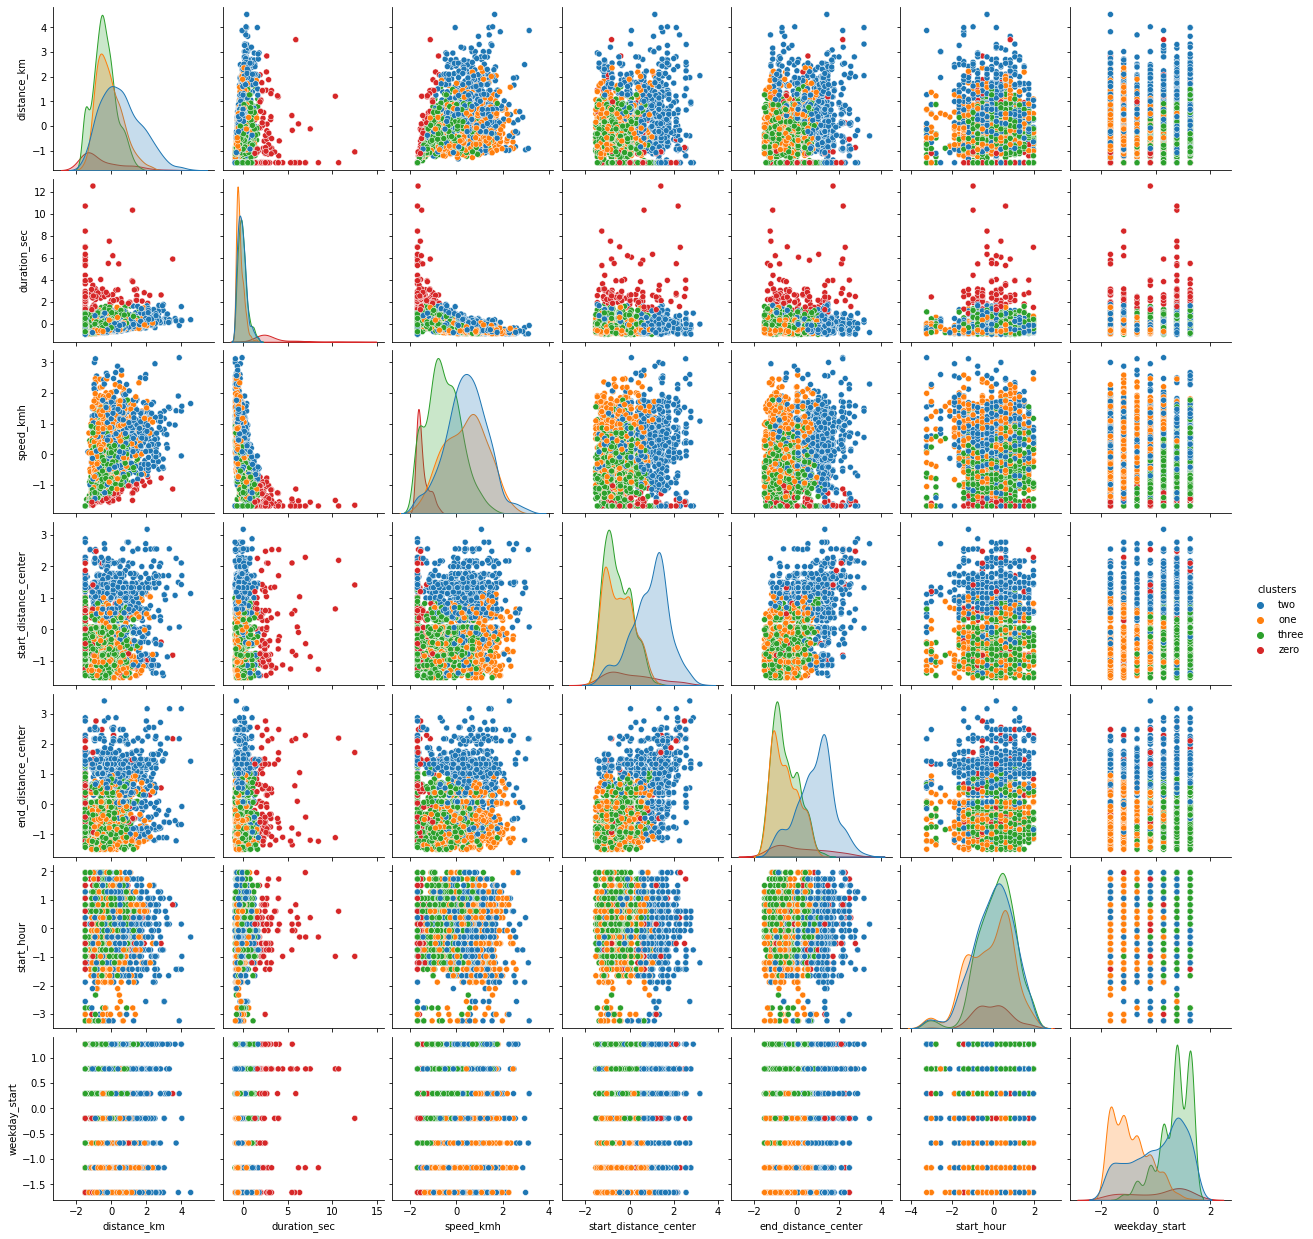

In [44]:
four_means = KMeans(n_clusters=4)
four_means.fit(XC_scaled)
df_C_scaled["clusters"] = four_means.predict(XC_scaled)
df_C_scaled["clusters"] = df_C_scaled["clusters"].apply(lambda x: numbers[x])
sns.pairplot(data=df_C_scaled, hue="clusters")

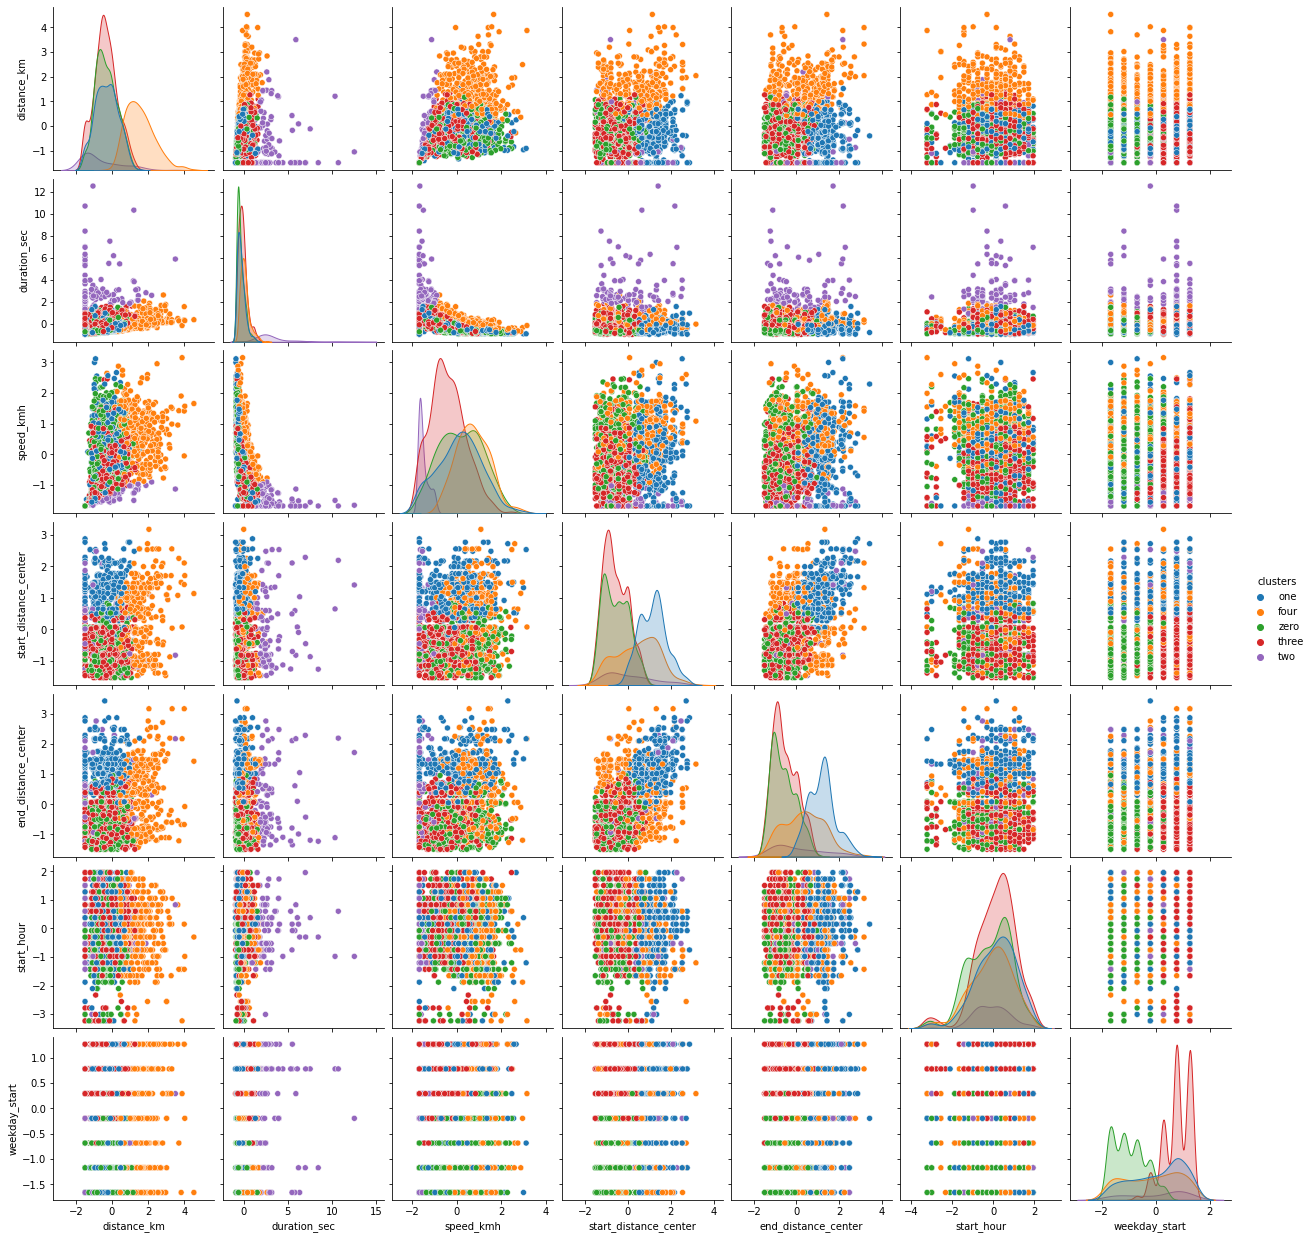

In [45]:
five_means = KMeans(n_clusters=5)
five_means.fit(XC_scaled)
df_C_scaled["clusters"] = five_means.predict(XC_scaled)
df_C_scaled["clusters"] = df_C_scaled["clusters"].apply(lambda x: numbers[x])
sns.pairplot(data=df_C_scaled, hue="clusters")

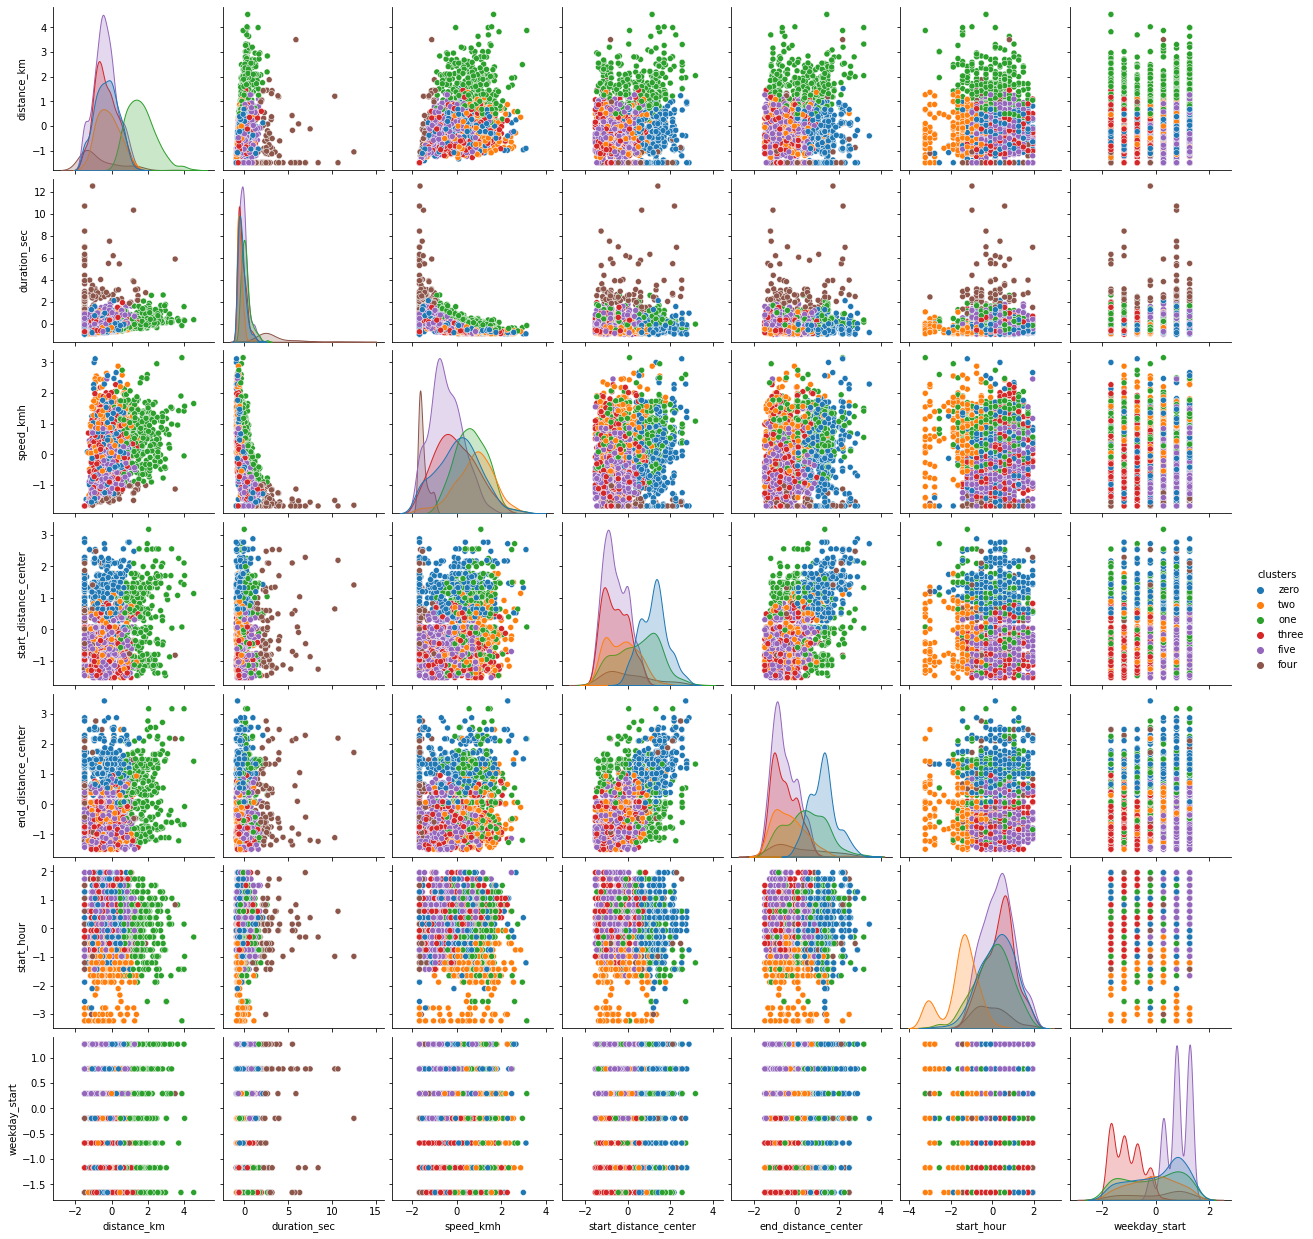

In [46]:
six_means = KMeans(n_clusters=6)
six_means.fit(XC_scaled)
df_C_scaled["clusters"] = six_means.predict(XC_scaled)
df_C_scaled["clusters"] = df_C_scaled["clusters"].apply(lambda x: numbers[x])
sns.pairplot(data=df_C_scaled, hue="clusters")

## Subscriber Cluster

In [47]:
XS = df_subscriber

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(XS)
XS_scaled = scaler.transform(XS)

# create a df out of array
XS_scaled_df = pd.DataFrame(XS_scaled, columns=XS.columns, index=XS.index)
XS_scaled_df.head(10)

distance_km  duration_sec  speed_kmh  start_distance_center  \
1     -0.106340     -0.128215  -0.128019              -0.947810   
2      0.306387      0.053041  -0.002599              -0.808334   
4      0.304559     -0.160274   0.833243               2.123864   
5     -0.214012      0.022215  -0.761297               0.483414   
6     -0.355654     -0.332898   0.211522              -0.392385   
7     -1.266668     -0.738566  -0.445395               1.174846   
8     -1.011892     -0.521552  -0.840598              -0.115654   
9     -0.602152     -0.427842   0.050856              -0.115654   
10    -0.877891     -0.551145  -0.094928               1.320782   
12    -0.702622     -0.517853   0.347117               0.359977   

    end_distance_center  start_hour  weekday_start  
1             -0.327097   -1.164849       1.297960  
2              0.376846    0.694454       1.297960  
4              1.047916    0.694454       1.846829  
5              1.206451   -0.751670      -1.446387  
6             -0.923131    0.694454      -1.446387  
7              1.331913   -0.958260      -0.897517  
8             -0.327097    0.487865      -0.897517  
9              0.376846    1.314222      -0.897517  
10             1.206451   -0.751670      -0.348648  
12             0.451682    0.901043      -0.348648

In [49]:
df_S_scaled = XS_scaled_df

In [50]:
## from sklearn.cluster import KMeans

In [51]:
k_max = 50  # We have 147 datapoints, more than 50 clusters are definitely not reasonable!

clusters = []
losses = []

for k in range(k_max):
    model = KMeans(n_clusters=k+1)
    model.fit(XS_scaled)
    clusters.append(k+1)
    losses.append(model.inertia_)

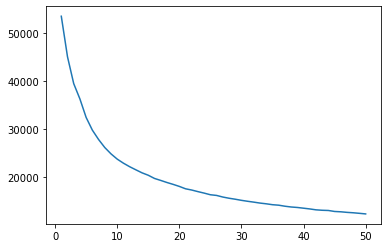

In [52]:
plt.plot(clusters, losses)
plt.show()

(0.0, 20.0)

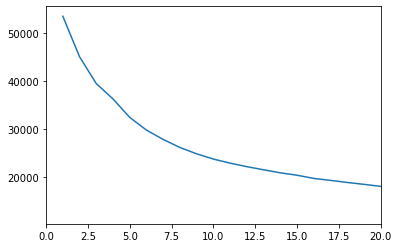

In [53]:
plt.plot(clusters, losses)
plt.xlim([0,20])

In [54]:
df_subscriber.head(10)

distance_km  duration_sec  speed_kmh  start_distance_center  \
1      1.713520         635.0   9.714443               1.441903   
2      2.203710         782.0  10.144955               1.688254   
4      2.201538         609.0  13.014019               6.867309   
5      1.585640         757.0   7.540691               3.969831   
6      1.417414         469.0  10.879936               2.422933   
7      0.335418         140.0   8.625037               5.191087   
8      0.638012         316.0   7.268486               2.911715   
9      1.124652         392.0  10.328440               2.911715   
10     0.797163         292.0   9.828031               5.448850   
12     1.005326         319.0  11.345370               3.751808   

    end_distance_center  start_hour  weekday_start  
1              2.500986           8              5  
2              3.751808          17              5  
4              4.944220          17              6  
5              5.225917          10              0  
6              1.441903          17              0  
7              5.448850           9              1  
8              2.500986          16              1  
9              3.751808          20              1  
10             5.225917          10              2  
12             3.884783          18              2

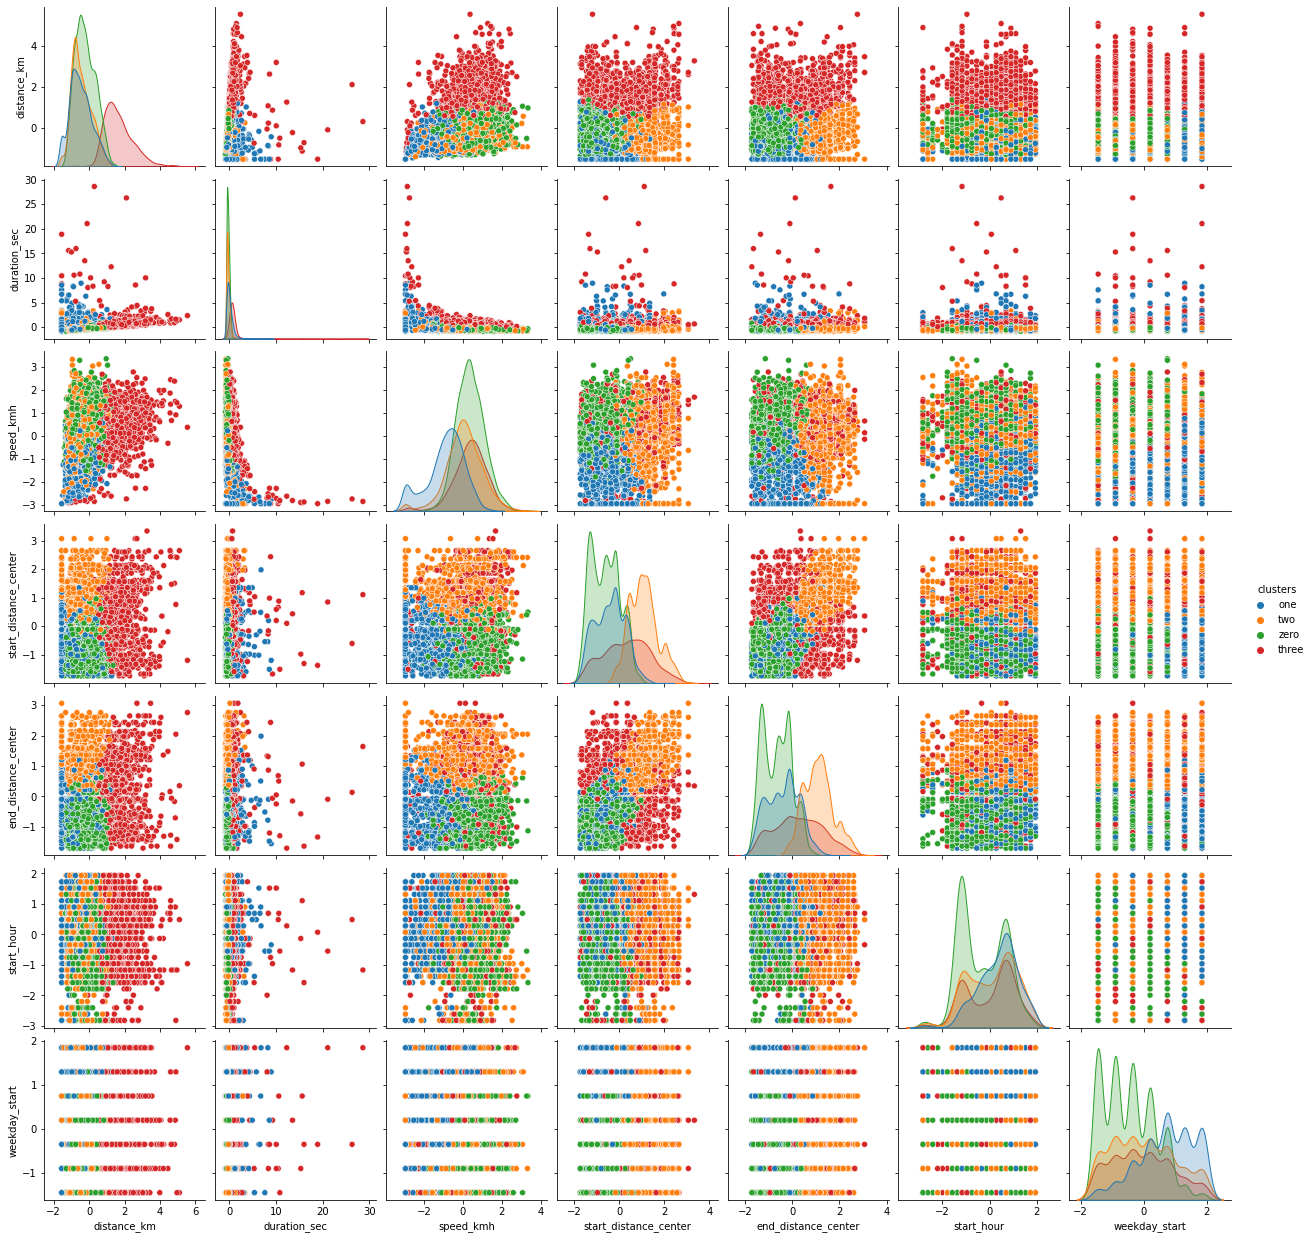

In [55]:
four_means = KMeans(n_clusters=4)
four_means.fit(XS_scaled)
df_S_scaled["clusters"] = four_means.predict(XS_scaled)
df_S_scaled["clusters"] = df_S_scaled["clusters"].apply(lambda x: numbers[x])
sns.pairplot(data=df_S_scaled, hue="clusters")

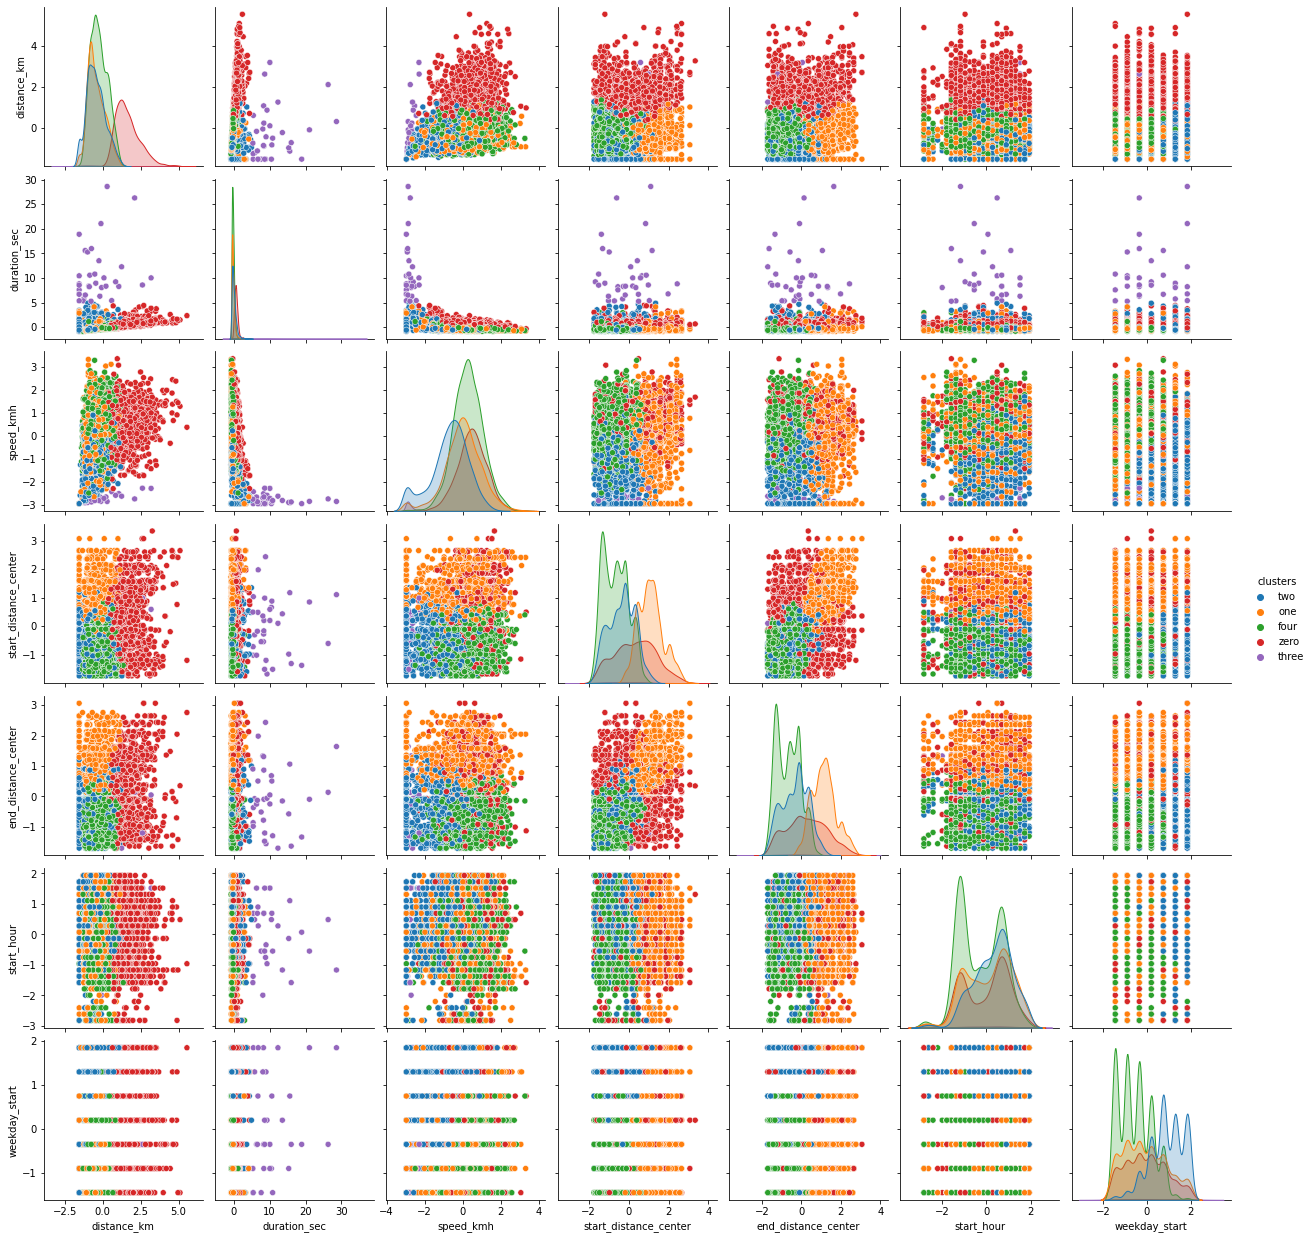

In [56]:
five_means = KMeans(n_clusters=5)
five_means.fit(XS_scaled)
df_S_scaled["clusters"] = five_means.predict(XS_scaled)
df_S_scaled["clusters"] = df_S_scaled["clusters"].apply(lambda x: numbers[x])
sns.pairplot(data=df_S_scaled, hue="clusters")

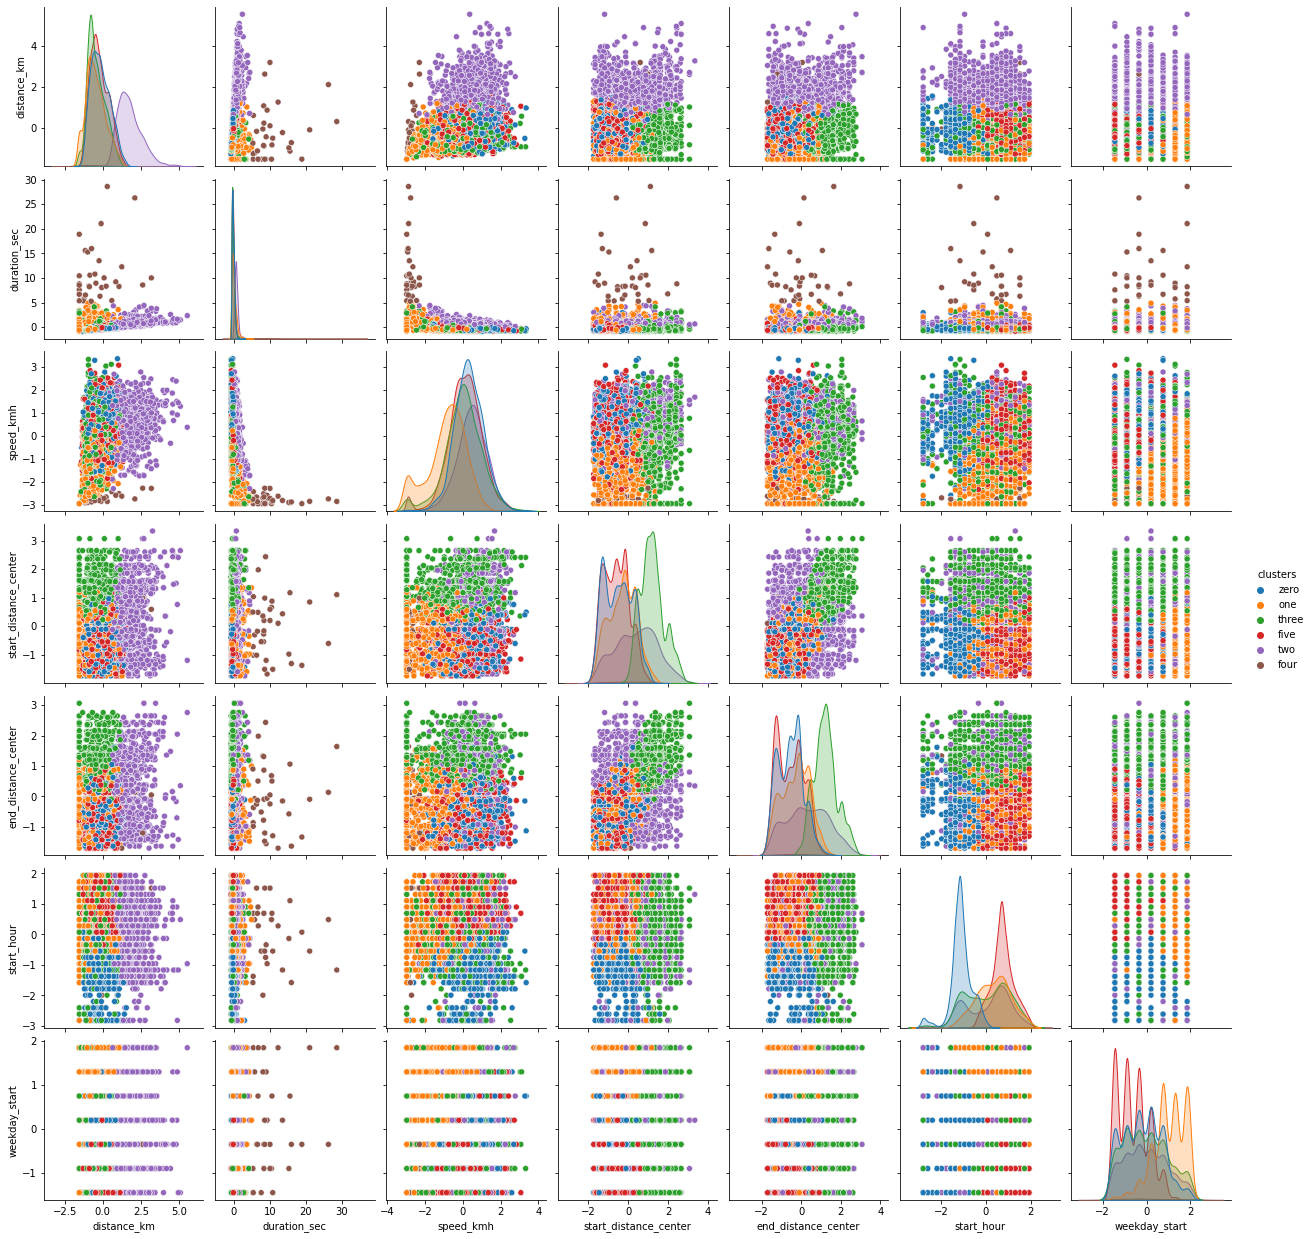

In [57]:
six_means = KMeans(n_clusters=6)
six_means.fit(XS_scaled)
df_S_scaled["clusters"] = six_means.predict(XS_scaled)
df_S_scaled["clusters"] = df_S_scaled["clusters"].apply(lambda x: numbers[x])
sns.pairplot(data=df_S_scaled, hue="clusters")